In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import xgboost
import random

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, LinearSVR
from cityhash import CityHash128

%matplotlib inline

In [6]:
%%time
with open('pool.json') as handler:
    data = [json.loads(line.strip()) for line in handler]

CPU times: user 31.7 s, sys: 1.25 s, total: 32.9 s
Wall time: 32.9 s


In [4]:
data[0].keys()

dict_keys(['uid', 'factors', 'images_metric', 'ts', 'rnd_pos', 'p', 'all_wizards_metric', 'query', 'prod_pos'])

In [46]:
Counter([line['factors'][10] for line in data if line['factors'] is not None])

Counter({-1.414383138834482: 32350, 9.110582964033286: 8305})

In [36]:
data[0]

{'all_wizards_metric': None,
 'factors': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  9.110582964033286,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  10.712458397853824,
  10.47125410433529,
  10.66662220025046,
  -2.17358888211298,
  9.309802172702904,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -3.1017517487593516,
  1.1867745989620901,
  1.2541722460951221,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.1116242846500108,
  -0.5172735329357692,
  -0.07294858200387742,
  -0.06990553550804786,
  -0.22778588057750715,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.2193900857941427,
  0.0,
  6.02659577533471,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -2.4254275669998098,
  -1.0166408448

In [5]:
len(data[0]['factors'])

1053

In [5]:
len(data)

90000

In [15]:
Counter([line['rnd_pos'] for line in data if line['images_metric'] is not None])

Counter({0: 2864,
         1: 3500,
         2: 4031,
         3: 4606,
         4: 5155,
         5: 5621,
         6: 5889,
         7: 6034,
         8: 6010,
         9: 5615})

In [4]:
Counter([line['images_metric'][0] for line in data if line['images_metric'] is not None])

Counter({0.0: 2366,
         1.0: 3240,
         2.0: 3801,
         3.0: 4352,
         4.0: 4885,
         5.0: 5456,
         6.0: 5795,
         7.0: 5940,
         8.0: 5895,
         9.0: 5637,
         10.0: 1080,
         11.0: 441,
         12.0: 239,
         13.0: 187,
         14.0: 10,
         16.0: 1})

In [5]:
a = [0] * 10
for line in data:
    if line['images_metric'] is not None:
        a[line['rnd_pos']] += 1. / line['p']
print('\n'.join(map(str, a)))

77682.43046231352
80799.30643392999
80888.33695030495
79714.39785005641
79733.39097078113
80293.12194286917
79729.16484546658
79844.73758562062
80788.92734481869
79122.19356200707


In [6]:
sum(a)

798596.0079481681

In [18]:
for x in data:
    if x['images_metric'] is not None:
        if x['rnd_pos'] == 100:
            print('jok')
            break

In [14]:
a = [x for x in data if x['rnd_pos'] < 100 and x['images_metric'] is not None]
print('not None:', len(a))
d = 0
for b in a:
    c = b['images_metric']
    if c[1] == 0 and c[2] == 0:
        d += 1
print('zeros:', d)

not None: 49325
zeros: 43251


In [19]:
Counter([line['images_metric'][2] for line in data if line['images_metric'] is not None])

Counter({0.0: 45599, 1.0: 3726})

In [47]:
len([1 for line in data if line['all_wizards_metric'] is None])

16384

In [41]:
np.mean([line['images_metric'][1] for line in data if line['images_metric'] is not None if line['images_metric'][1] != 0])

1.8780965969341787

In [14]:
Counter([line['all_wizards_metric'][2] for line in data if line['all_wizards_metric'] is not None])

Counter({0.0: 61728, 1.0: 11458, 2.0: 420, 3.0: 10})

In [84]:
cnt = 0
for i, row in enumerate(data):
    metric = row['images_metric']
    if metric is not None:
        if metric[2] > 0:
            print(i)
            cnt += 1

9
10
12
13
14
47
66
101
121
123
124
130
135
159
166
167
170
171
179
182
211
222
223
229
281
332
401
417
418
429
431
441
523
531
557
558
559
566
567
628
629
630
631
637
638
642
713
771
819
832
871
872
889
934
1036
1037
1092
1094
1098
1100
1132
1135
1154
1188
1318
1407
1410
1411
1413
1419
1420
1503
1539
1557
1574
1582
1599
1600
1601
1602
1603
1604
1605
1606
1607
1609
1610
1611
1613
1614
1615
1616
1617
1618
1620
1621
1628
1643
1653
1654
1698
1741
1824
1888
1894
1905
1914
1990
1997
2000
2001
2062
2088
2094
2124
2126
2147
2179
2180
2183
2189
2202
2209
2213
2214
2224
2240
2274
2276
2278
2280
2281
2282
2283
2284
2285
2286
2287
2288
2290
2291
2294
2295
2296
2297
2298
2299
2300
2316
2323
2366
2371
2390
2451
2485
2497
2505
2506
2508
2543
2577
2581
2609
2622
2644
2652
2740
2741
2786
2809
2810
2816
2818
2824
2944
2955
2985
2995
3023
3090
3091
3122
3132
3133
3135
3137
3139
3148
3161
3169
3190
3241
3245
3255
3328
3357
3359
3360
3382
3418
3434
3461
3463
3464
3475
3514
3515
3534
3542
3543
3545
3564
35

58606
58661
58696
58698
58710
58803
58805
58808
58814
58831
58838
58878
59023
59039
59044
59079
59099
59100
59150
59233
59306
59307
59344
59345
59428
59456
59470
59471
59472
59473
59475
59484
59494
59497
59498
59525
59526
59527
59570
59589
59602
59605
59617
59619
59626
59640
59642
59655
59656
59700
59712
59740
59748
59797
59798
59801
59822
59887
59889
59911
59954
59964
60003
60147
60305
60336
60367
60369
60370
60401
60420
60463
60473
60474
60619
60720
60724
60754
60758
60763
60774
60775
60776
60809
60822
60843
60894
60904
60908
60910
60968
60985
60988
61069
61074
61161
61168
61202
61252
61278
61304
61324
61335
61438
61445
61447
61492
61521
61605
61629
61630
61646
61659
61723
61724
61725
61729
61730
61731
61732
61739
61741
61742
61744
61792
61801
61804
61850
61854
61858
61894
61895
61925
61954
61974
61978
61997
62100
62102
62103
62115
62122
62145
62187
62188
62194
62197
62204
62225
62241
62318
62319
62320
62322
62333
62346
62413
62488
62494
62496
62572
62574
62590
62608
62627
62661
6269

In [85]:
cnt

3726

In [ ]:
Counter([line['images_metric'][1] for line in data[:100]])

In [9]:
possible_positions = np.array(list(Counter([line['rnd_pos'] for line in data]).keys()))

In [78]:
possible_positions

array([100,   5,   6,   4,   8,   2,   1,   9,   3,   0,   7])

In [91]:
data[131]['query']

'340 341 342 343'

In [92]:
queries = []
for line in data:
    queries += list(map(int, line['query'].split(' ')))

In [95]:
counter = Counter(queries)

In [96]:
len(counter)

77563

In [4]:
classifier = xgboost.XGBClassifier()

In [51]:
Counter([len(line['factors']) for line in data])

Counter({1052: 15867, 1053: 74133})

In [3]:
features = np.array([line['factors'][:1052] for line in data])
positions = np.array([line['rnd_pos'] for line in data])
target = np.array([0 if line['images_metric'] is None else line['images_metric'][2]
                   for line in data])
probas = np.array([line['p'] for line in data])

In [4]:
features_train, features_test,\
probas_train, probas_test,\
positions_train, positions_test,\
y_train, y_test = train_test_split(features, probas, positions, target, random_state=42)

In [5]:
train_data = np.concatenate([features_train, positions_train.reshape(-1, 1)], axis=1)

In [73]:
classifier.fit(train_data, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [105]:
def get_best_position(obj_features):
    obj_features = np.repeat(obj_features.reshape(1, -1),
                             len(possible_positions), axis=0)
    test_data = np.concatenate([obj_features, possible_positions.reshape(-1, 1)], axis=1)
    probas = classifier.predict_proba(test_data)
    scores = [proba[1] for proba in probas]
    assert len(scores) == len(possible_positions)
    return possible_positions[np.argmax(scores)]

answers = [get_best_position(obj_features) for obj_features in features_test]

In [106]:
Counter(answers)

Counter({0: 12765, 1: 9228, 2: 507})

In [122]:
print('count_metric:', count_metric(answers, positions_test, probas_test))
for pos in sorted(possible_positions):
    print('count metric with constant prediction {}:'.format(pos),
          count_metric_for_const(pos, positions_test, probas_test))
print()
    
print('target_metric:', target_metric(answers, positions_test, y_test, probas_test))
for pos in sorted(possible_positions):
    print('target metric with constatnt prediction {}'.format(pos),
          target_metric_for_const(pos, positions_test, y_test, probas_test))

count_metric: 23057.9229094
count metric with constant prediction 0: 21655.9654378
count metric with constant prediction 1: 22534.9466952
count metric with constant prediction 2: 22943.2160959
count metric with constant prediction 3: 22875.6862301
count metric with constant prediction 4: 23011.4426216
count metric with constant prediction 5: 21323.9035385
count metric with constant prediction 6: 22530.2272364
count metric with constant prediction 7: 22692.7638165
count metric with constant prediction 8: 23652.2979913
count metric with constant prediction 9: 21441.0230165
count metric with constant prediction 100: 22185.3457107

target_metric: 2383.22962967
target metric with constatnt prediction 0 1942.7591099
target metric with constatnt prediction 1 2430.08259565
target metric with constatnt prediction 2 1951.17076156
target metric with constatnt prediction 3 1315.9075981
target metric with constatnt prediction 4 1098.72398744
target metric with constatnt prediction 5 1002.25615585
t

In [6]:
def target_metric(predicted_positions, real_positions, relevance, probas):
    return np.mean(relevance / probas *
                   (predicted_positions == real_positions))


def count_metric(predicted_positions, real_positions, probas):
    return target_metric(predicted_positions, real_positions, np.ones_like(probas), probas)


def target_metric_for_const(constant_position, real_positions, relevance, probas):
    return target_metric(np.repeat(constant_position, len(real_positions)),
                         real_positions, relevance, probas)


def count_metric_for_const(constant_position, real_positions, probas):
    return count_metric(np.repeat(constant_position, len(real_positions)),
                        real_positions, probas)

In [49]:
def get_best_position(score_function, obj_features, possible_positions):
    obj_features = np.repeat(obj_features.reshape(1, -1),
                             len(possible_positions), axis=0)
    test_data = np.concatenate([obj_features, possible_positions.reshape(-1, 1)], axis=1)
    scores = score_function(test_data)
    assert len(scores) == len(possible_positions)
    return possible_positions[np.argmax(scores)]


def _remove_zeros(array, relevance):
    return np.array([element for element, element_relevance in zip(array, relevance)
                     if element_relevance != 0])


def get_metric(train_size, model, features, probas, positions, relevance, possible_positions, 
               score_function=None, relevance_to_target=None, check_print=False, random_state=42):
    features = _remove_zeros(features, relevance) 
    probas = _remove_zeros(probas, relevance) 
    positions = _remove_zeros(positions, relevance) 
    relevance = _remove_zeros(relevance, relevance) 

    
    features_train, features_test,\
    probas_train, probas_test,\
    positions_train, positions_test,\
    y_train, y_test = train_test_split(features, probas, positions, relevance,
                                       test_size=1 - train_size, random_state=random_state)
    
    train_data = np.concatenate([features_train, positions_train.reshape(-1, 1)], axis=1)
    if relevance_to_target is not None:
        y_train = relevance_to_target(y_train)
    model.fit(train_data, y_train)
    
    if isinstance(model, xgboost.XGBClassifier) or isinstance(model, LinearSVC):
        if score_function is None:
            raise ValueError("score_function can't be None if using Classifier")
        predict_function = lambda test_data: score_function(model.predict_proba(test_data))
    elif isinstance(model, xgboost.XGBRegressor) or isinstance(model, LinearSVR):
        predict_function = model.predict
    else: 
        raise ValueError('Unsupported model type: {}'.format(type(model)))
    
    answers = [get_best_position(predict_function, obj_features, possible_positions)
               for obj_features in features_test]
    
    metric = target_metric(answers, positions_test, y_test, probas_test)
    
    if check_print:
        print("answers' counter:", list(sorted(Counter(answers).items(),
                                               key=lambda x: x[0])))

        print('count_metric:', count_metric(answers, positions_test, probas_test))
        for pos in possible_positions:
            print('count metric with constant prediction {:3}:'.format(pos),
                  count_metric_for_const(pos, positions_test, probas_test))
        print()

        print('target_metric:', metric)
        for pos in possible_positions:
            print('target metric with constatnt prediction {:3}:'.format(pos),
                  target_metric_for_const(pos, positions_test, y_test, probas_test))
    return metric

In [8]:
positions = np.array([line['rnd_pos'] for line in data])
probas = np.array([line['p'] for line in data])
possible_positions = np.array(list(sorted(Counter([line['rnd_pos'] for line in data]).keys())))

In [9]:
def get_feature(line, hash_size=521):
    features = line['factors'][:1052]
    # hashes = Counter([h % hash_size for h in map(CityHash128, map(str, line['query']))])
    # features += [hashes[i] for i in range(hash_size)]
    return features
    
features = np.array([get_feature(line) for line in data])

In [12]:
def get_target(line):
    key = 'images_metric'
    if line[key] is None:
        return 0
    else:
        return line[key][2] - line[key][1]

target = np.array([get_target(line) for line in data])

In [62]:
Counter([line['all_wizards_metric'][2] for line in data if line['rnd_pos'] == 100 if line['all_wizards_metric'] is not None])

Counter({0.0: 16566, 1.0: 3281, 2.0: 36})

In [50]:
get_metric(train_size=0.75,
           model=xgboost.XGBClassifier(),
           features=features,
           probas=probas,
           positions=positions,
           relevance=target,
           possible_positions=possible_positions,
           relevance_to_target=lambda relevance: (relevance > 0).astype(np.int),
           score_function=lambda probas: probas[:, 1],
           check_print=True)

answers' counter: [(0, 2), (1, 27), (2, 7), (3, 15), (4, 349), (5, 113), (9, 1006)]
count_metric: 0.703290550275
count metric with constant prediction   0: 5.88567166492
count metric with constant prediction   1: 2.83427949608
count metric with constant prediction   2: 2.35921983484
count metric with constant prediction   3: 1.35949875911
count metric with constant prediction   4: 1.26794456299
count metric with constant prediction   5: 1.03091084022
count metric with constant prediction   6: 0.764045146206
count metric with constant prediction   7: 0.595339707133
count metric with constant prediction   8: 0.567850154662
count metric with constant prediction   9: 0.373883948541
count metric with constant prediction 100: 0.0

target_metric: 0.234435550574
target metric with constatnt prediction   0: -11.0815243596
target metric with constatnt prediction   1: -1.4802832716
target metric with constatnt prediction   2: -0.977272773396
target metric with constatnt prediction   3: -0.3393562

0.23443555057365351

In [14]:
get_metric(train_size=0.75,
           model=xgboost.XGBRegressor(),
           features=features,
           probas=probas,
           positions=positions,
           relevance=target,
           possible_positions=possible_positions,
           random_state=None,
           check_print=True)

answers' counter: [(0, 5), (1, 471), (2, 811), (3, 2034), (4, 721), (5, 360), (6, 582), (7, 139), (8, 5425), (9, 11952)]
count_metric: 1.00875275026
count metric with constant prediction   0: 0.922661685419
count metric with constant prediction   1: 1.01688173643
count metric with constant prediction   2: 1.01639301576
count metric with constant prediction   3: 0.997033977274
count metric with constant prediction   4: 0.986042243696
count metric with constant prediction   5: 1.01896024278
count metric with constant prediction   6: 1.00938915627
count metric with constant prediction   7: 1.03353794067
count metric with constant prediction   8: 1.01630200311
count metric with constant prediction   9: 0.99873837595
count metric with constant prediction 100: 0.99462583514

target_metric: 0.0114717766897
target metric with constatnt prediction   0: -0.635313059552
target metric with constatnt prediction   1: -0.12513896094
target metric with constatnt prediction   2: -0.0626666133916
target

0.011471776689746209

In [48]:
get_metric(train_size=0.75,
           model=xgboost.XGBRegressor(),
           features=features,
           probas=probas,
           positions=positions,
           relevance=target,
           possible_positions=possible_positions,
           random_state=None,
           check_print=True)

AttributeError: 'list' object has no attribute 'reshape'

In [10]:
def get_metric_array(train_size, n=10):
    return [get_metric(train_size=train_size,
                       model=xgboost.XGBRegressor(),
                       features=features,
                       probas=probas,
                       positions=positions,
                       relevance=target,
                       possible_positions=possible_positions)
            for _ in range(10)]

In [11]:
train_sizes = np.arange(0.1, 0.9, 0.1)
metrics = [np.mean(get_metric_array(train_size)) for train_size in train_sizes]

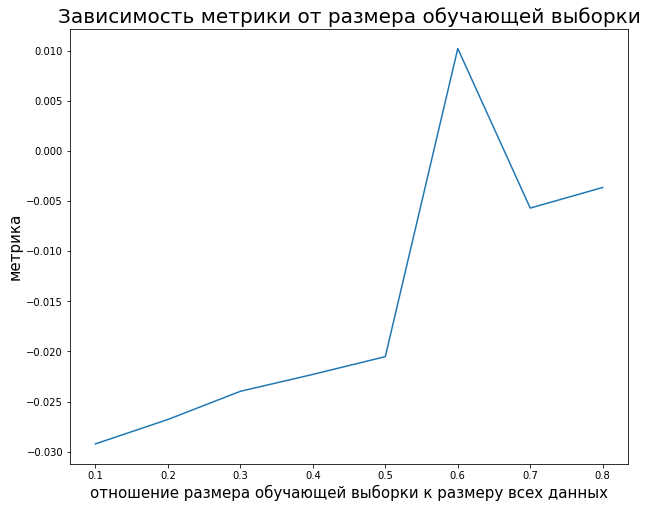

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, metrics)
plt.xlabel('отношение размера обучающей выборки к размеру всех данных', fontsize=15)
plt.ylabel('метрика', fontsize=15)
plt.title('Зависимость метрики от размера обучающей выборки', fontsize=20);

In [13]:
metrics = [get_metric(train_size=0.3,
                      model=xgboost.XGBRegressor(),
                      features=features,
                      probas=probas,
                      positions=positions,
                      relevance=target,
                      possible_positions=possible_positions,
                      random_state=None)
           for i in range(10)]

In [33]:
metrics

[-0.045495962539641673,
 0.031703295935863879,
 0.01448685054524433,
 0.018401228654068385,
 0.021623809783172934,
 -0.024093687787342475,
 0.012702690763222601,
 -0.012893345627094245,
 -0.013312625113459755,
 -0.0074019408733172242]

In [14]:
metrics += [-0.045495962539641673, 0.031703295935863879, 0.01448685054524433, 0.018401228654068385,
            0.021623809783172934, -0.024093687787342475, 0.012702690763222601, -0.012893345627094245,
            -0.013312625113459755, -0.0074019408733172242]

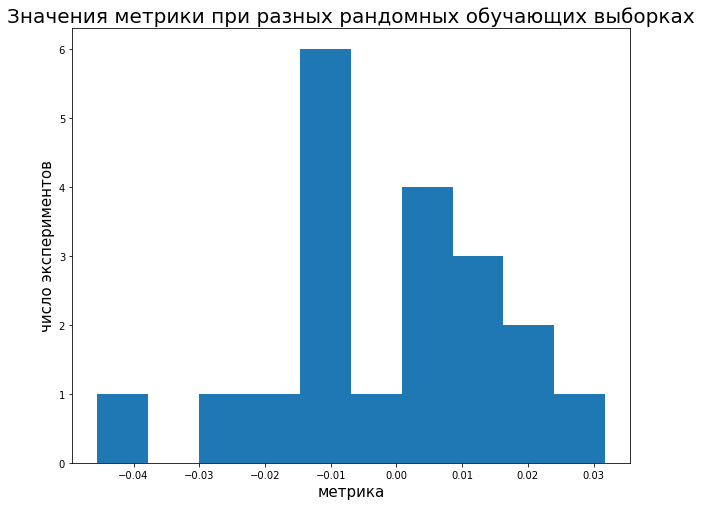

In [18]:
plt.figure(figsize=(10, 8))
plt.hist(metrics, bins=10)
plt.title('Значения метрики при разных рандомных обучающих выборках', fontsize=20)
plt.xlabel('метрика', fontsize=15)
plt.ylabel('число экспериментов', fontsize=15);